## Importing Dependencies.

Data From: https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data

In [165]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Mergeing all the files into single file.

In [36]:
# df = pd.read_csv('./Data/Sales_April_2019.csv')
files = [file for file in os.listdir('./Data')]
files.remove('.DS_Store')
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)

In [87]:
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### General information about Dataset.

In [88]:
df.shape

(186850, 6)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [123]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Year                0
State               0
Sales               0
dtype: int64

## Task 1: Data Cleaning.

There are 545 NaN for each column in Data. we will remove NaN for for this Analysis.

In [91]:
df.dropna(inplace=True)

### Change of Datatype.

In [92]:
df['Quantity Ordered'].value_counts(dropna=False)

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

As we can see that, 'Quantity Ordered ' has 355 row, which is not correct. so we will check rows for error. 
If there is an error on other rows as well. we will remove those rows for this Analysis.


In [94]:
df[df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


There are 355 row with same error for every column. so we will romove those rows from every columns.

In [95]:
df.drop(df[df['Quantity Ordered']=='Quantity Ordered'].index, inplace=True)

In [96]:
# function to change the dtype.

def d_type(col, type):
    df[col] = df[col].astype(type)

d_type('Quantity Ordered', 'int')
d_type('Price Each', 'float')

In [102]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

### Creating Month, Year, Sales and State Column.

In [104]:
df['Month'] = df['Order Date'].dt.month

In [120]:
df['Year'] = df['Order Date'].dt.year

In [121]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [113]:
df['State'] = df['Purchase Address'].str[-8:-5]

In [124]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,State,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,MA,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,CA,11.99


# Task 2: Data Analysis

### What are most common products?

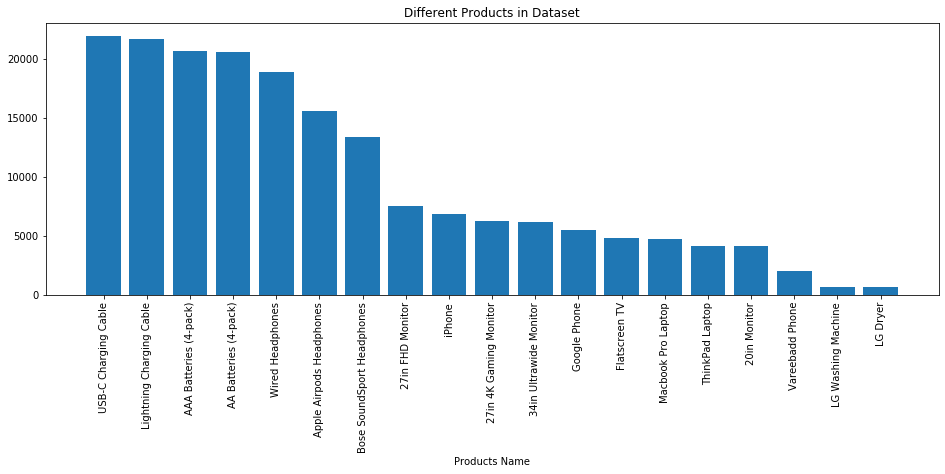

In [239]:
prd = df['Product'].value_counts()

def bar(x_value, y_value, x_label=None, y_label=None, Title=None, width=16, height=5, rotate=90):
    plt.figure(figsize=(width, height))
    plt.bar(x_value, y_value)
    plt.xticks(rotation=rotate)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(Title)
    plt.show()

bar(prd.index, prd.values, 'Products Name', '','Different Products in Dataset')

### What the Quantity of Ordered for different product?

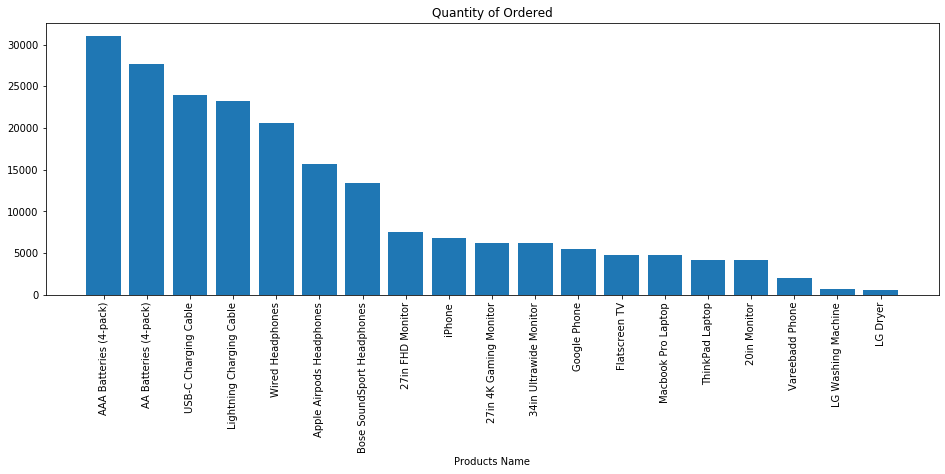

In [240]:
order = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

bar(order.index, order.values, 'Products Name', '','Quantity of Ordered')

### What the Quantity of Ordered for different product?

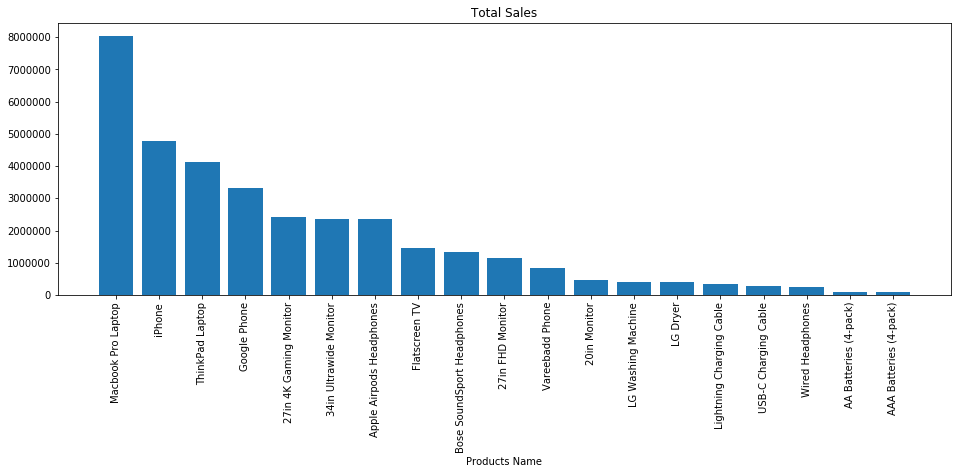

In [241]:
sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
bar(sales.index, sales.values, 'Products Name', '','Total Sales')